<a href="https://colab.research.google.com/github/ddekun/prob_theory_and_math_stat/blob/lesson7/lesson7/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Урок 7. Многомерный статистический анализ. Линейная регрессия**

### __Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [26]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
Y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

**1. Найдём коэффициенты линейной регрессии:**

In [27]:
b1 = (np.mean(X * Y) - np.mean(X) * np.mean(Y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b1

2.620538882402765

In [28]:
b0 = np.mean(Y) - b1 * np.mean(X)
b0

444.1773573243596

Модель линейной регрессии имеет вид:

$$y = 444.2 + 2.62 \cdot x$$

Коэффициенты линейной регрессии с помощью метода наименьших квадратов.

In [29]:
x2 = pd.DataFrame(X)
y2 = pd.DataFrame(Y)
x2.shape

(10, 1)

Добавляем столбец из 1, соответствующий фиктивному фактору.

In [30]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape

(10, 2)

In [31]:
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [32]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [33]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
b

array([[444.17735732],
       [  2.62053888]])

Модель линейной регрессии имеет вид:

$$y = 444.2 + 2.62 \cdot x$$

**2. Визуализируем полученные результаты на графике:**

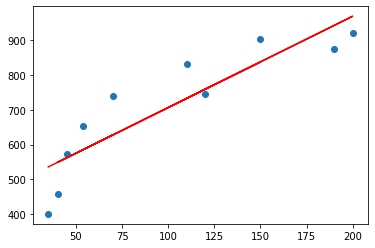

In [34]:
ox = X
oy = b0 + b1 * ox

plt.scatter(X, Y)
plt.plot(ox, oy, color='red')

**3. Посчитаем коэффициент детерминации. Для этого создадим массив из предсказанных значений:**

In [35]:
Z = b0 + b1 * X
print(f'real: {Y[:5]}')
print(f'pred: {Z[:5]}')

real: [401. 574. 874. 919. 459.]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


 Коэффициент детерминации:

In [36]:
R1 = Z.var() / Y.var()
R1

0.7876386635293678

In [37]:
np.corrcoef(X, Y) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Посчитаем среднюю ошибку аппроксимации:

In [38]:
def mean_approximation_error(y_real, y_pred):
  return np.abs((y_real - y_pred) / y_real).mean()

In [39]:
mean_approximation_error(Y, Z)

0.11469251843561709

**4. Оценка значимости уравнения линейной регрессии с помощью F-критерия Фишера.**

Соответствующая статистика равна:

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

где $R^2$ - коэффициент детерминации, $n$ - число наблюдений, $k$ - число факторов.

In [40]:
k1 = 1
k2 = X.shape[0] - k1 - 1
T1 = (R1 / (1 - R1) * (k2 / k1))
T1

29.67164085966437

Для уровня значимости $\alpha = 0.05$ посчитаем по таблице значение $F_{crit} = F(1, 10)$

In [41]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Вывод: имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

**5. Оценка значимости получившихся параметров уравнения регрессии и построение для них доверительных интервалов с помощью t-статистики Стьюдента.**

__Стандартная ошибка коэффициента наклона__ вычисляется по формуле:

$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

где:
* $x$, $x_i$ - соответственно, все значения и конкретное значение фактора
* $y_i$ - конкретное значение оцениваемой (целевой) переменной
* $z_i$ - "предсказанное" значение, полученное с помощью модели регрессии
* $n$ - число элементов в выборке

In [53]:
def standard_error_slope(x, y, z):
    n = X.shape[0]

    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()

    return np.sqrt(upper / lower)

In [54]:
s_slope = standard_error_slope(X, Y, Z)
s_slope

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8} = 2.306$.

In [55]:
T = b1 / s_slope
T

5.447168150485579

Значение попало в критическую область, значит, значение параметра  $b_1$  является значимым. 

Доверительный интервал для параметра $b_1$:

In [56]:
t = 2.306
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111619555527858, 3.729915809252744)

Аналогично проверим значимость коэффициента сдвига $b_0$ и построим доверительный интервал для него. Стандартная ошибка коэффициента сдвига вычисляется по формуле:

$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [58]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [60]:
s_intercept = standard_error_intercept(X, Y, Z)
s_intercept

56.46649755068153

Значение статистики $T$:

In [61]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра $b_0$ является значимым.

Доверительный интервал для параметра $b_0$:

In [62]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.965613972488, 574.3891006762312)

__Задача 2__

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Теория малых выборок разработана английским статистиком В. Госсетом (писавшим под псевдонимом Стьюдент) в начале XX в. 

В 1908 г. им построено специальное распределение, которое позволяет и при малых выборках соотносить (t) и доверительную вероятность F(t). 

При (n) > 100, таблицы распределения Стьюдента дают те же результаты, что и таблицы интеграла вероятностей Лапласа.

При 30 < (n) < 100 различия незначительны. 

При (n) < 30 погрешность таблицы интеграла вероятностей Лапласа становится значительной.